<b>Mounting Google Drive in Google Colab

In [1]:
from google.colab import drive
drive.mount('/mydrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /mydrive


In [2]:
cd /

/


[texte du lien](https://)<b>Navigating to project directory

In [3]:
cd ./mydrive/My Drive/Colab Notebooks/Speech-Commands-Recognition

/mydrive/My Drive/Colab Notebooks/Speech-Commands-Recognition


<b>Installing required packages

In [0]:
!pip3 install http://download.pytorch.org/whl/cu80/torch-0.4.1-cp36-cp36m-linux_x86_64.whl 
!pip3 install torchvision
!pip3 install librosa
!pip3 install Pillow==4.1.1
!pip3 install PIL
!pip3 install image
import PIL.Image

    100% |████████████████████████████████| 483.0MB 48.9MB/s 
torchvision 0.2.1 has requirement pillow>=4.1.1, but you'll have pillow 4.0.0 which is incompatible.
fastai 1.0.45 has requirement torch>=1.0.0, but you'll have torch 0.4.1 which is incompatible.
  Found existing installation: torch 1.0.1.post2
    Uninstalling torch-1.0.1.post2:
      Successfully uninstalled torch-1.0.1.post2
    100% |████████████████████████████████| 2.0MB 12.4MB/s 
imgaug 0.2.8 has requirement numpy>=1.15.0, but you'll have numpy 1.14.6 which is incompatible.
fastai 1.0.45 has requirement torch>=1.0.0, but you'll have torch 0.4.1 which is incompatible.
albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.8 which is incompatible.
  Found existing installation: Pillow 4.0.0
    Uninstalling Pillow-4.0.0:
      Successfully uninstalled Pillow-4.0.0


    100% |████████████████████████████████| 5.7MB 7.4MB/s 
imgaug 0.2.8 has requirement numpy>=1.15.0, but you'll have numpy 1.14.6 which is incompatible.
fastai 1.0.45 has requirement torch>=1.0.0, but you'll have torch 0.4.1 which is incompatible.
albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.8 which is incompatible.
  Found existing installation: Pillow 5.4.1
    Uninstalling Pillow-5.4.1:
      Successfully uninstalled Pillow-5.4.1


  Could not find a version that satisfies the requirement PIL (from versions: )
No matching distribution found for PIL


<b>Importing required packages from project

In [0]:
import torch
from torchvision import models
import matplotlib.pyplot as plt
from data_loaders import data_loader
from trainer import train
from utils import util

In [0]:
PATH = './datasets/'
train_path = f'{PATH}train'
valid_path = f'{PATH}valid2'
test_path = f'{PATH}test2'

In [0]:
ls

base/          datasets/  demo.ipynb    README.md  trainer/        utils/
data_loaders/  demo/      PrepareData/  saved/     training.ipynb


In [6]:
train_dl, valid_dl, test_dl = data_loader.get_data_loaders(train_path=train_path, valid_path=valid_path, test_path=test_path,
                                                          batch_size=64, num_workers=8)

Calculating mean and std of training dataset
Mean:tensor([0.9234, 0.9234, 0.9234])
Std:tensor([0.1503, 0.1503, 0.1503])


In [0]:
ls

base/          datasets/  demo.ipynb    README.md  trainer/        utils/
data_loaders/  demo/      PrepareData/  saved/     training.ipynb


In [7]:
model = models.resnet34(pretrained=True)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.torch/models/resnet34-333f7ec4.pth
87306240it [00:02, 42730432.66it/s]


In [0]:
criterion = torch.nn.CrossEntropyLoss()

In [9]:
trainer = train.ModelTrainer(model=model, train_dl=train_dl, valid_dl=valid_dl, test_dl=test_dl, criterion=criterion)

Model moved to GPU


<b>ModelTrainer modifies the fc layer so that last layer output corressponds to number of classes in training data

In [10]:

trainer.model.fc

Linear(in_features=512, out_features=10, bias=True)

<b>ModelTrainer freezes all the layers except the fc layer. We can prevent this by passing freeze=False while creating ModelTrainer

In [11]:
next(iter(trainer.model.parameters())).requires_grad

False

<b>dummy_sgdr is a function which plots changing learning rate at every iteration in sgdr considering the passed parameters 

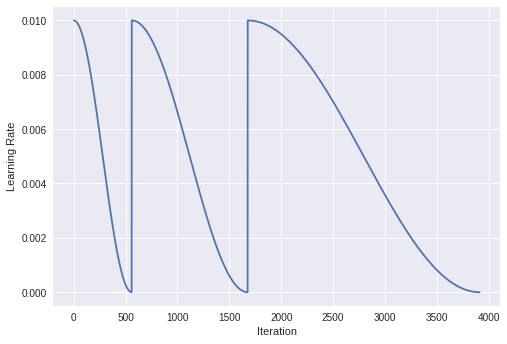

In [12]:
trainer.dummy_sgdr(learning_rate=1e-2, n_cycles=3, cycle_len=1, cycle_mult=2)

<b>Training the newly added fully connected layer for 3 epochs</b>
<br>Note:The fit method by default does SGDR. We have only passed value for n_cycles, by not passing values for cycle_len and cycle_mult (by default they both are 1), it is equivalent to training normally for 3 epochs

In [14]:
trainer.fit(n_cycles=3, learning_rate=1e-2)

Cycle:1
	Epoch:1/1
	Train Loss:1.92998468875885
	Valid Loss:0.021515620589256285 Valid Accuracy:0.536
	--------------------------------------------------
Cycle:2
	Epoch:1/1
	Train Loss:1.8250802755355835
	Valid Loss:0.021464240431785582 Valid Accuracy:0.544
	--------------------------------------------------
Cycle:3
	Epoch:1/1
	Train Loss:1.1919275522232056
	Valid Loss:0.021372363746166228 Valid Accuracy:0.542
	--------------------------------------------------


<b>The fit method appends the learing rates at each iteration in a list named 'opt_lrs'</b>
<br>We can plot that list to visualize the graph of learning rate vs iterations for current SGDR

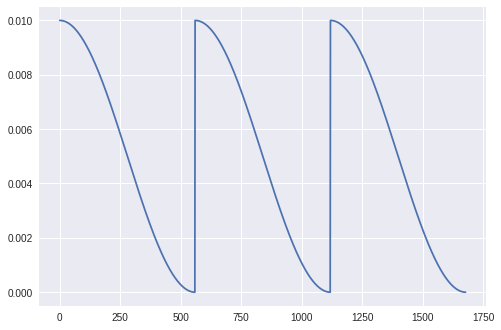

In [15]:
plt.plot(trainer.opt_lrs)

<b>Unfreezing all the layers to finetune the network

In [0]:
trainer.unfreeze()

<b>Verifying that the model is unfreezed

In [17]:
next(iter(trainer.model.parameters())).requires_grad

True

<b>Training the model using SGDR for 4 cycles with cycle_mult=2</b>
<br>Initially, the cycle_len is 1 epoch. After every cycle, cycle_len is multiplied by cycle_mult to increase the cycle length (number of epochs in cycle). This is the 'restart' in 'Stochastic Gradient Descent with Restarts'.

In [18]:
trainer.fit(n_cycles=4, cycle_len=1, cycle_mult=2, learning_rate=1e-2, save_snapshot=True)

Cycle:1
	Epoch:1/1
	Train Loss:0.2682686448097229
	Valid Loss:0.0015061035081744194 Valid Accuracy:0.972
	--------------------------------------------------
	Snapshot saved!
Cycle:2
	Epoch:1/2
	Train Loss:0.002503037452697754
	Valid Loss:0.0013689454048871994 Valid Accuracy:0.9745
	--------------------------------------------------
	Epoch:2/2
	Train Loss:0.0006334781646728516
	Valid Loss:0.0012948589799925685 Valid Accuracy:0.98
	--------------------------------------------------
	Snapshot saved!
Cycle:3
	Epoch:1/4
	Train Loss:0.014728386886417866
	Valid Loss:0.0028867131862789393 Valid Accuracy:0.96
	--------------------------------------------------
	Epoch:2/4
	Train Loss:0.0023217995185405016
	Valid Loss:0.0013559083119034766 Valid Accuracy:0.98
	--------------------------------------------------
	Epoch:3/4
	Train Loss:0.04299310967326164
	Valid Loss:0.0014396180100739002 Valid Accuracy:0.982
	--------------------------------------------------
	Epoch:4/4
	Train Loss:0.00060844421386

<b>Again, plotting the opt_lrs list to visualize SGDR

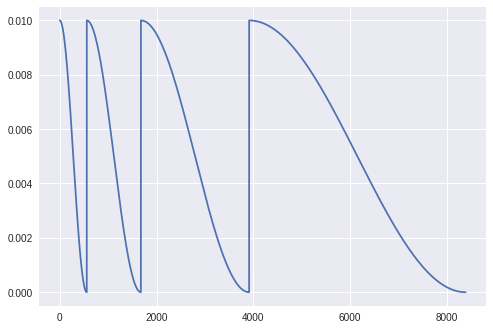

In [19]:
plt.plot(trainer.opt_lrs)

<b>Loading the latest model

In [0]:
state = torch.load('saved/2019-02-22_21:02:41/cycle_3')

In [0]:
trainer.model.load_state_dict(state['model'])

In [22]:
test_acc = trainer.test_epoch()

Performing Test Epoch


In [23]:
print(f'Test Accuracy:{test_acc}')

Test Accuracy:0.970970970970971


<b>Predicting test set with top 3 snapshots (models)

In [0]:
snapshot_test_acc_3 = trainer.predict('saved/2019-02-22_21:02:41', n_models=3)

In [26]:
print(f'Snapshot Ensemble Test Accuracy with top 3 models:{snapshot_test_acc_3}')

Snapshot Ensemble Test Accuracy with top 3 models:0.9714714714714715


<b>Predicting test set with top 4 snapshots (models)

In [0]:
snapshot_test_acc_4 = trainer.predict('saved/2019-02-22_21:02:41', n_models=4)

In [29]:
print(f'Snapshot Ensemble Test Accuracy with top 4 models:{snapshot_test_acc_4}')

Snapshot Ensemble Test Accuracy with top 4 models:0.9714714714714715
